# **INITIALIZING EVERYTHING**

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Data.csv")
fund_data = pd.read_csv("NCAP_Funding.csv")
state_data = pd.read_csv("State_data.csv")

# Lower case all column names for uniformity
data.columns = [x.lower() for x in data.columns]
fund_data.columns = [x.lower() for x in fund_data.columns]
state_data.columns = [x.lower() for x in state_data.columns]

# # IMPUTE MISSING VALUES IN PM2.5 (NOT REALLY NEEDED)
# data["pm2.5"].fillna(data["pm2.5"].median(), inplace=True)

# set - in fund_data to NaN
fund_data.replace("-", np.nan, inplace=True)
# change data type of fund_data to float64
for i in range(3, 8):
    fund_data.iloc[:, i] = fund_data.iloc[:, i].astype(np.float64)

# Checking data
# display(data.head())
# display(fund_data.head())
# display(state_data.head())

<!-- # **1. Spatial Aggregation** -->

##### 1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [250]:
state_mean_grp = data.groupby("state")["pm2.5"].mean()
ans = state_mean_grp.idxmax()
print(f"State with highest average PM2.5 = {ans}")

State with highest average PM2.5 = Delhi


##### 2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [251]:
hazardous = data[(data['pm2.5'] > 300) & (data['timestamp'].str[0:4] == '2023')]
state_hazardous = hazardous.groupby("state")["timestamp"].nunique()
ans = state_hazardous.idxmax()
print(f"{ans}, {state_hazardous.max()} days")

Delhi, 49 days


##### 3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [252]:
var_data = data[data['timestamp'].str[0:4] == "2023"]
std_var_data = var_data.groupby("state")['pm2.5'].std()
print(f"{std_var_data.idxmax()} has highest variability with {std_var_data.max()} standard deviation")

Delhi has highest variability with 82.79710576209911 standard deviation


##### 4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [253]:
covid_data = data[data['timestamp'].str[0:4].isin(['2020', '2021'])]
avg_covid_data = covid_data.groupby("state")["pm2.5"].mean()
print(f"{avg_covid_data.idxmin()} had the minimum average PM2.5 levels during covid period with average = {avg_covid_data.min()}")

Mizoram had the minimum average PM2.5 levels during covid period with average = 14.323350150801287


# **2. Temporal Aggregation**

##### 1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [254]:
aug2020_data = data[data['timestamp'].str[0:7] == '2020-08']
print(f"The station with highest PM2.5 value was {aug2020_data.loc[aug2020_data["pm2.5"].idxmax()]['station']} with value = {aug2020_data["pm2.5"].max()}")

The station with highest PM2.5 value was Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with value = 805.51


##### 2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
- [Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [255]:
station_data = data[(data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & (data['timestamp'].str[0:4] == '2018')]
def getseason(row):
    month = row["timestamp"].split('-')[1]
    if month in ['12', '01', '02']:
        return "winter"
    elif month in ['03', '04', '05']:
        return "summer"
    elif month in ['06', '07', '08', '09']:
        return "monsoon"

station_data["season"] = station_data.apply(getseason, axis = 1)
season_station_data = station_data.groupby("season")["pm2.5"].mean()
display(season_station_data)
print(f"{season_station_data.idxmax()} has the highest PM2.5 concentration at Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with value {season_station_data.max()}")

season
monsoon    34.425196
summer           NaN
winter     67.492344
Name: pm2.5, dtype: float64

winter has the highest PM2.5 concentration at Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with value 67.4923443634478


**Ans**
Winter generally has more pollution because of
- Increased heating demand during winter leads to higher emissions from burning fossil fuels.
- Use of vehicles increases in winter due to colder weather, causing higher levels of exhaust emissions.
- Lower temperatures and stagnant air contribute to the trapping of pollutants near the ground.

##### 3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


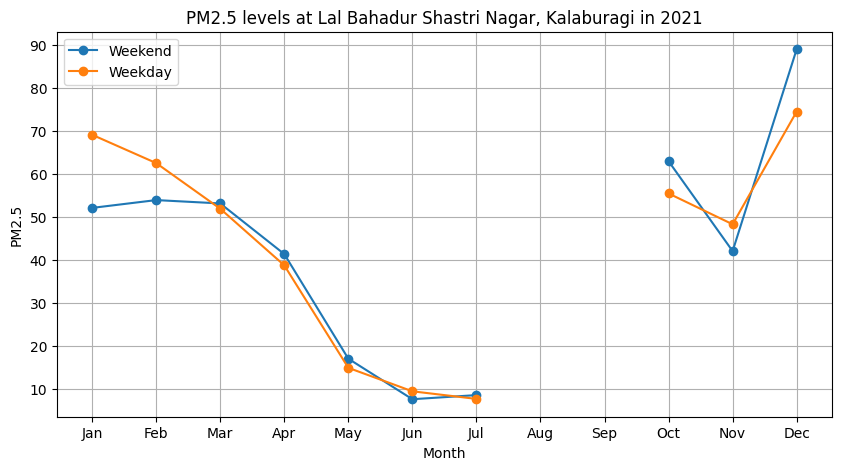

In [256]:
# IMPUTE DATA FOR SUMMER ------------------------- CAN DO
Months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
station_data = station_data = data[(data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & (data['timestamp'].str[0:4] == '2021')]
station_data['timestamp'] = pd.to_datetime(station_data['timestamp'])
station_data['day'] = station_data['timestamp'].dt.day_name()
station_data['month'] = station_data['timestamp'].dt.month_name()

#Chronological order of months
station_data['month'] = pd.Categorical(station_data['month'], categories=Months, ordered=True)

#Grouping by month and calculating mean PM2.5
station_data_weekend = station_data[(station_data['day'] == 'Saturday') | (station_data['day'] == 'Sunday')]
station_data_weekday = station_data[(station_data['day'] != 'Saturday') & (station_data['day'] != 'Sunday')]
station_data_weekend_mean = station_data_weekend.groupby("month")['pm2.5'].mean()
station_data_weekday_mean = station_data_weekday.groupby("month")['pm2.5'].mean()

#Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(months, station_data_weekend_mean.values, label='Weekend', marker='o')
plt.plot(months, station_data_weekday_mean.values, label='Weekday', marker='o')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('PM2.5 levels at Lal Bahadur Shastri Nagar, Kalaburagi in 2021')
plt.legend()
plt.grid()
plt.show()

# **3. Spatio-temporal aggregation**

##### 1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [257]:
state_data_2022 = data[(data['timestamp'].str[0:4] == '2022')]
def getseason(row):
    month = row["timestamp"].split('-')[1]
    if month in ['12', '01', '02']:
        return "winter"
    elif month in ['03', '04', '05']:
        return "summer"
    elif month in ['06', '07', '08', '09']:
        return "monsoon"

state_data_2022["season"] = state_data_2022.apply(getseason, axis = 1)
season_avg = state_data_2022.groupby(['state','season'])['pm2.5'].mean().unstack()
season_avg['difference'] = abs(season_avg['monsoon'] - season_avg['summer']) / season_avg['summer']*100
# display(season_avg)
print(f"{season_avg['difference'].idxmax()} with a difference of {season_avg['difference'].max()}%")

Assam with a difference of 61.17641855538734%


##### 2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

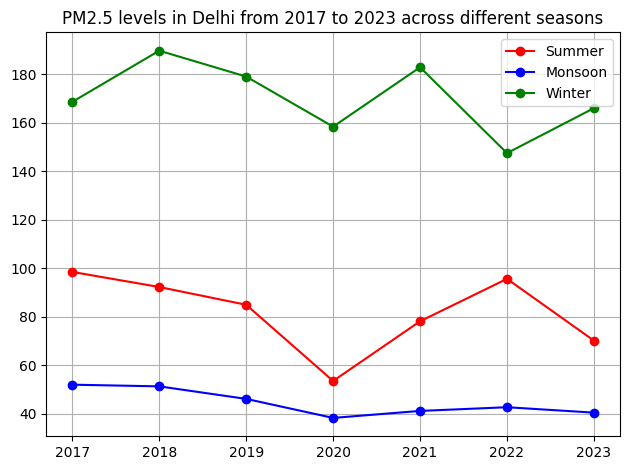

In [258]:
seasons = ["summer", "monsoon", "winter"]
color = ["r", "b", "g"]
def getseason(row):
    month = row["timestamp"].split('-')[1]
    if month in ['12', '01', '02']:
        return "winter"
    elif month in ['03', '04', '05']:
        return "summer"
    elif month in ['06', '07', '08', '09']:
        return "monsoon"

delhi_data = data[(data['timestamp'].str[:4].isin(['2017', '2018', '2019', '2020', '2021','2022','2023'])) & (data['state'] == 'Delhi')]
delhi_data["year"] = delhi_data['timestamp'].str[0:4]
delhi_data["season"] = delhi_data.apply(getseason, axis=1)
delhi_mean_data = delhi_data.groupby(["season", "year"])["pm2.5"].mean().unstack()
for i in range(len(seasons)):
    plt.plot(delhi_mean_data.loc[seasons[i]].index, delhi_mean_data.loc[seasons[i]].values, marker='o', color=color[i], label=seasons[i].capitalize())
plt.title('PM2.5 levels in Delhi from 2017 to 2023 across different seasons')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

**Ans**: 
- We can see that the average PM2.5 levels in Delhi drops in Monsoon and reaches really high in Winters

##### 3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

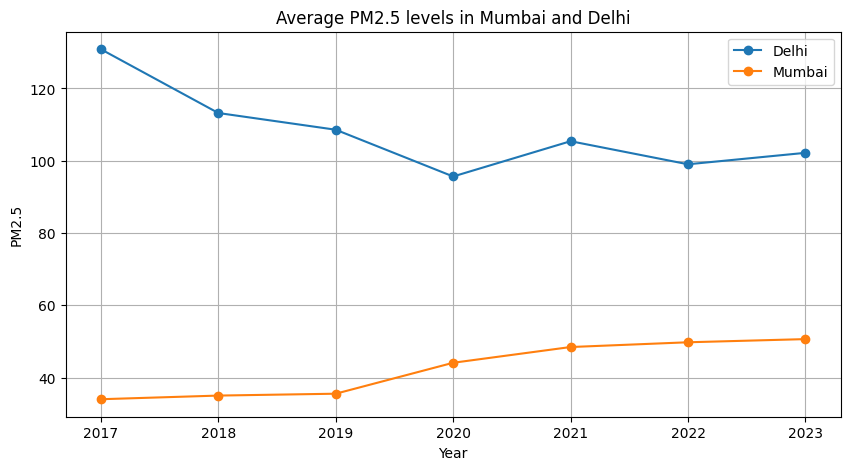

Delhi has higher standard deviation(fluctuation) of PM2.5 levels


In [259]:
mumbai_data = data[(data['timestamp'].str[:4].isin(['2015','2016','2017', '2018', '2019', '2020', '2021','2022','2023'])) & (data['city'].isin(['Mumbai', 'Navi Mumbai']))]
delhi_data = data[(data['timestamp'].str[:4].isin(['2015','2016','2017', '2018', '2019', '2020', '2021','2022','2023'])) & (data['state'] == 'Delhi')]
delhi_data['year'] = delhi_data['timestamp'].str[:4]
mumbai_data['year'] = mumbai_data['timestamp'].str[:4]

delhi_year_data = delhi_data.groupby("year")['pm2.5'].mean()
mumbai_year_data = mumbai_data.groupby("year")['pm2.5'].mean() 

plt.figure(figsize=(10, 5))
plt.plot(delhi_year_data.index, delhi_year_data.values, marker='o', label="Delhi")
plt.plot(mumbai_year_data.index, mumbai_year_data.values, marker='o', label="Mumbai")
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.title('Average PM2.5 levels in Mumbai and Delhi')
plt.legend()
plt.grid()
plt.show()

delhi_data.groupby("year")['pm2.5'].std()
mumbai_data.groupby("year")['pm2.5'].std()
print(f"{ans} has higher standard deviation(fluctuation) of PM2.5 levels")

# **4. Population-Based**

##### 1. Which state in India has the highest number of monitoring stations relative to its population? 

In [260]:
state_unique_stations = data.groupby(["state"])["station"].nunique()
state_unique_stations = pd.merge(state_unique_stations, state_data, on="state")
ans_idx = (state_unique_stations["station"]/state_unique_stations["population"]).idxmax()
print(f"{state_unique_stations.loc[ans_idx, "state"]} has the highest number of monitoring station relative to its population")

Chandigarh has the highest number of monitoring station relative to its population


##### 2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

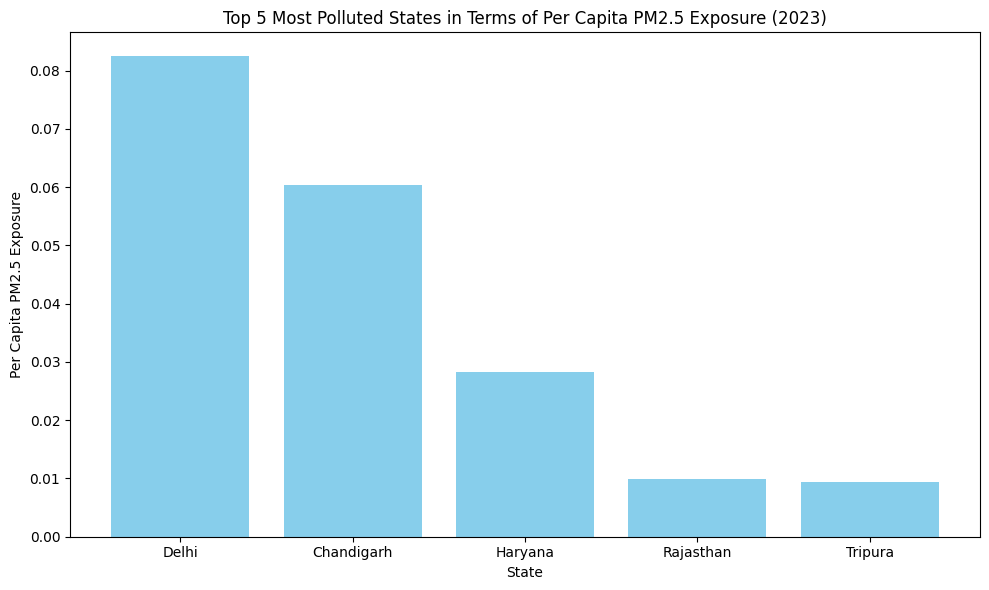

In [261]:
data_2023 = data[data['timestamp'].str[0:4] == '2023']
state_data_2023 = data_2023.groupby('state')['pm2.5'].sum()
merged_data = pd.merge(state_data_2023, state_data, on="state")
merged_data['per_capita_pm2.5'] = (merged_data['pm2.5']/merged_data['population'])
top_5_states = merged_data.nlargest(5, 'per_capita_pm2.5')
# display(top_5_states)
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['state'], top_5_states['per_capita_pm2.5'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure (2023)')
plt.tight_layout()
plt.show()

##### 3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.

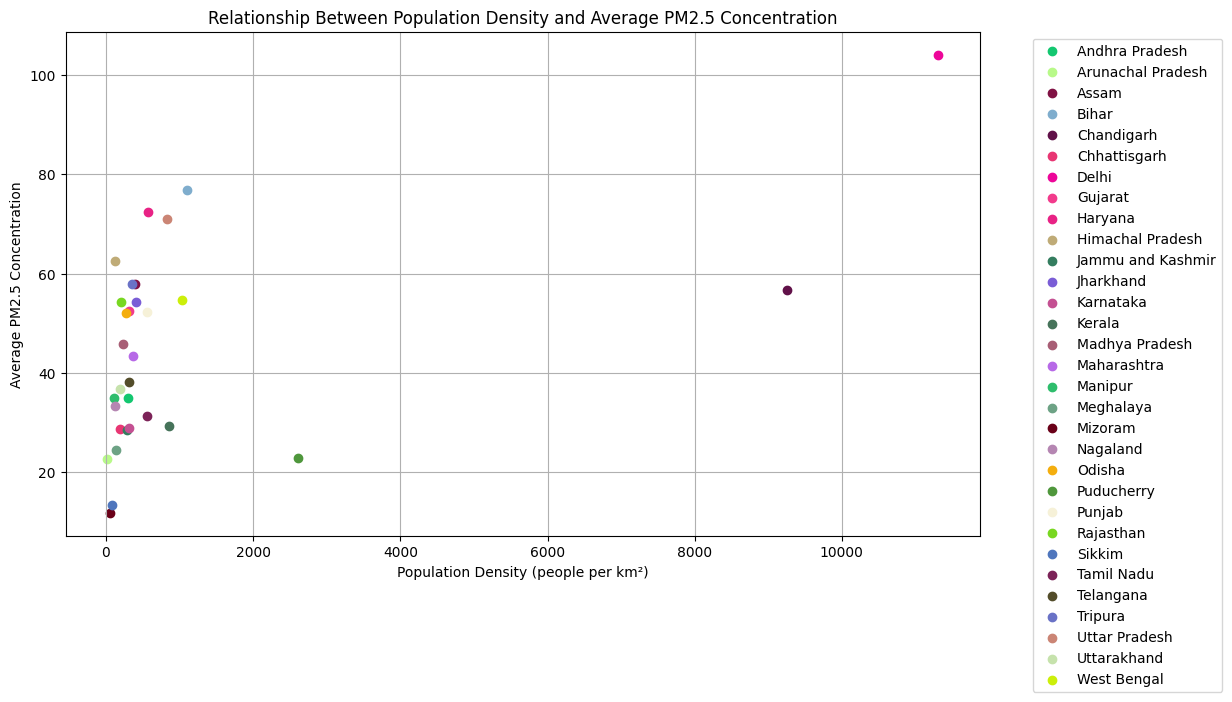

In [262]:
avg_pm25_by_state = data.groupby('state')['pm2.5'].mean()
merged_data = pd.merge(avg_pm25_by_state, state_data, on="state")
merged_data["population_density"] = merged_data['population']/merged_data['area (km2)']
plt.figure(figsize=(10, 6))
np.random.seed(7)
colors = np.random.rand(len(merged_data), 3) # Get a list of distinct colors

for i, state in enumerate(merged_data["state"].unique()):
    curr_state = merged_data[merged_data["state"] == state]
    plt.scatter(curr_state['population_density'], curr_state['pm2.5'], color=colors[i], label=state)

plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and Average PM2.5 Concentration')
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **5. Area - Based**

##### 1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
- X-axis: States.
- Y-axis: PM2.5 concentration per square kilometer.
- Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

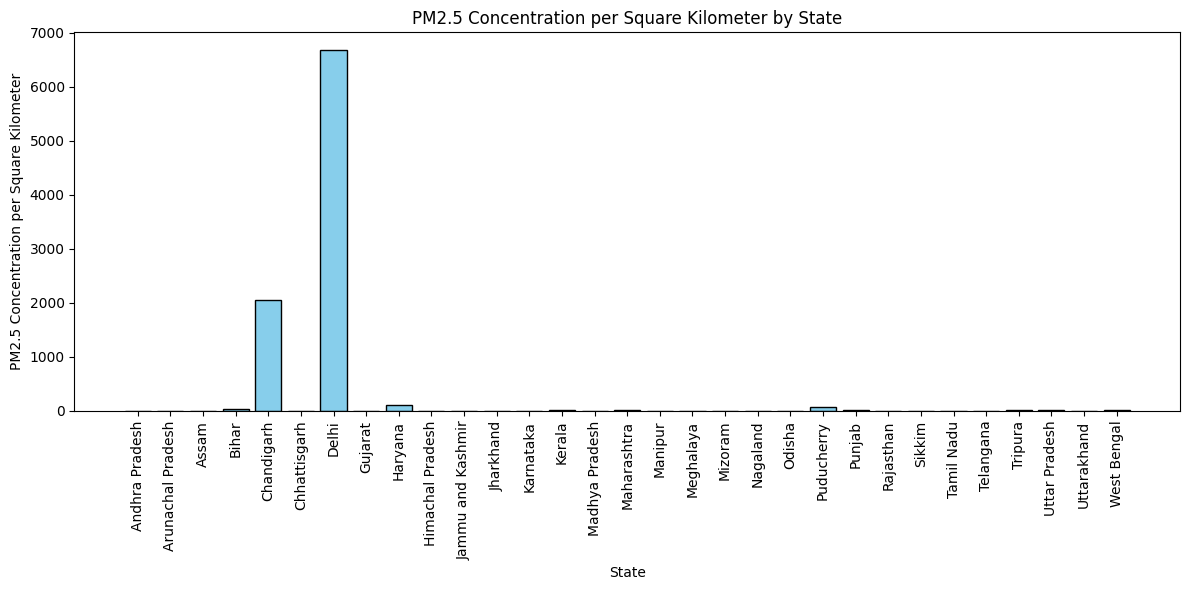

In [263]:
total_pollution = data.groupby('state')['pm2.5'].sum()
merged_data = pd.merge(total_pollution, state_data, on="state")
merged_data["pm25_per_sq_km"] = merged_data['pm2.5']/merged_data['area (km2)']
# display(merged_data)
plt.figure(figsize=(12, 6))
plt.bar(merged_data['state'], merged_data['pm25_per_sq_km'], color='skyblue', edgecolor='black')
plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per Square Kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

The state with highest number of stations relative to it's area is Delhi with stations per square kilometer = 0.026954177897574125


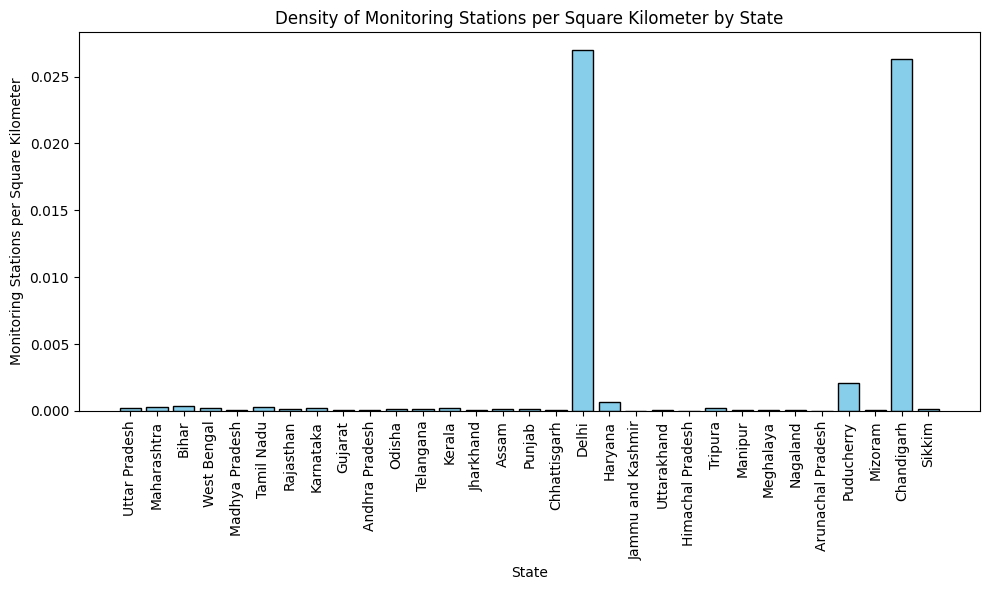

In [264]:
state_unique_stations = data.groupby("state")["station"].nunique()
merged_data = pd.merge(state_data, state_unique_stations, on="state")
merged_data["stations_per_sqkm"] = merged_data["station"]/merged_data["area (km2)"]
# display(merged_data)

ans = merged_data.loc[merged_data["stations_per_sqkm"].idxmax(), "state"]
print(f"The state with highest number of stations relative to it's area is {ans} with stations per square kilometer = {merged_data["stations_per_sqkm"].max()}")

plt.figure(figsize=(10, 6))
plt.bar(merged_data['state'], merged_data['stations_per_sqkm'], color='skyblue', edgecolor='black')
plt.xlabel('State')
plt.ylabel('Monitoring Stations per Square Kilometer')
plt.title('Density of Monitoring Stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [265]:
maharashtra_mean = data[(data['state'] == "Maharashtra") & (data['timestamp'].str[0:4] == '2021')]['pm2.5'].mean()
mp_mean = data[(data['state'] == "Madhya Pradesh") & (data['timestamp'].str[0:4] == '2021')]['pm2.5'].mean()
# display(maharashtra_mean, mp_mean)
maharashtra_population_density = state_data[state_data['state'] == 'Maharashtra']['population']/state_data[state_data['state'] == 'Maharashtra']['area (km2)']
mp_population_density = state_data[state_data['state'] == 'Madhya Pradesh']['population']/state_data[state_data['state'] == 'Madhya Pradesh']['area (km2)']
# display(maharashtra_population_density, mp_population_density)
print(f"Average pm2.5 and population density of Maharashtra = {maharashtra_mean} {np.float64(maharashtra_population_density)} respectively")
print(f"Average pm2.5 and population density of Madhya Pradesh = {mp_mean} {np.float64(mp_population_density)} respectively")
print(f"Maharashtra has highly urbanized and industrial regions like Mumbai, Pune, and Nashik, leading to more vehicular emissions, industrial pollutants, and construction dust. Madhya Pradesh, despite having large cities like Bhopal and Indore, has more rural and forested regions, which could contribute to better air quality.")

Average pm2.5 and population density of Maharashtra = 46.44004417107665 365.1920230864474 respectively
Average pm2.5 and population density of Madhya Pradesh = 47.095951831498965 235.60855728429985 respectively
Maharashtra has highly urbanized and industrial regions like Mumbai, Pune, and Nashik, leading to more vehicular emissions, industrial pollutants, and construction dust. Madhya Pradesh, despite having large cities like Bhopal and Indore, has more rural and forested regions, which could contribute to better air quality.


# **6. Funding Based**

##### 1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [266]:
data_2021 = data[data["timestamp"].str[0:4] == '2021']
funded_states = set(fund_data[fund_data["amount released during fy 2021-22"] > 0]["state"])
pm25_funded = data_2021[data_2021["state"].isin(funded_states)]["pm2.5"].mean()
pm25_not_funded = data_2021[~data_2021["state"].isin(funded_states)]["pm2.5"].mean()

print(f"Average PM2.5 levels in NCAP funded states (2021): {pm25_funded:.2f}")
print(f"Average PM2.5 levels in non-funded states (2021): {pm25_not_funded:.2f}")

Average PM2.5 levels in NCAP funded states (2021): 65.35
Average PM2.5 levels in non-funded states (2021): 55.35


##### 2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

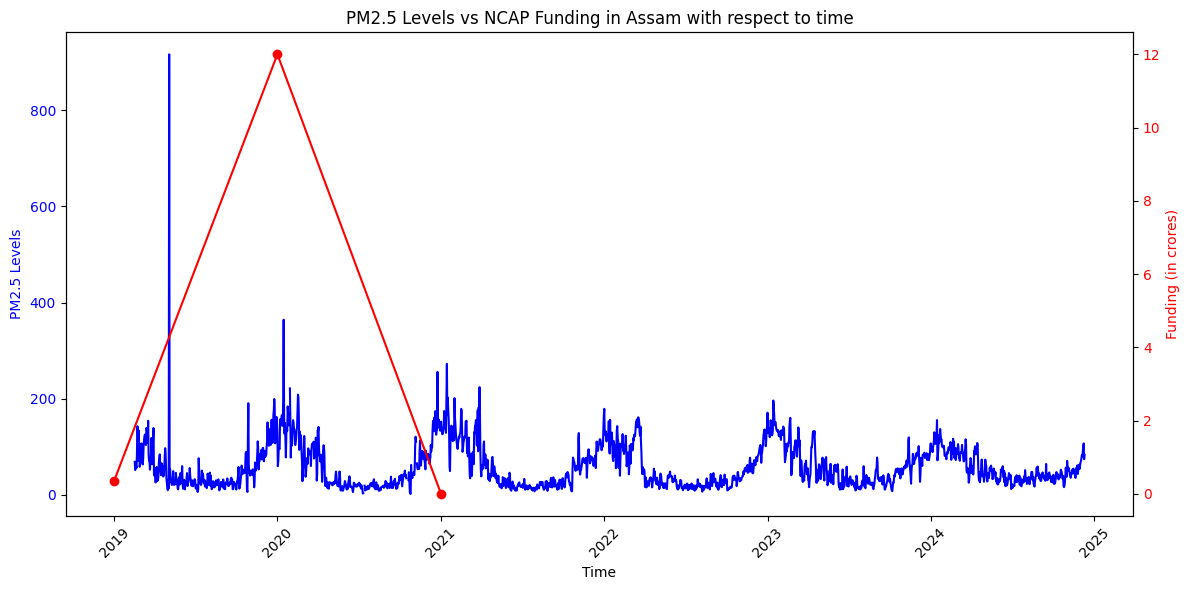

The increase in NCAP funding around 2020 did not lead to a clear, sustained improvement in air quality, as PM2.5 levels continued to fluctuate.


In [267]:
import matplotlib.dates as mdates

data_assam = data[data['state'] == "Assam"]
fund_assam = fund_data[fund_data['state'] == 'Assam']

daily_pm25 = data_assam.groupby('timestamp')['pm2.5'].mean().reset_index()
daily_pm25['timestamp'] = pd.to_datetime(daily_pm25['timestamp'])

funding_years = ["2019", "2020", "2021"]
funding_years = pd.to_datetime(funding_years, format='%Y')
fund_assam_values = [
    fund_assam["amount released during fy 2019-20"].sum(),
    fund_assam["amount released during fy 2020-21"].sum(),
    fund_assam["amount released during fy 2021-22"].sum()
]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(daily_pm25['timestamp'], daily_pm25['pm2.5'], label='PM2.5 Levels', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('PM2.5 Levels', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(funding_years, fund_assam_values, label='NCAP Funding', color='red', marker='o')
ax2.set_ylabel('Funding (in crores)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('PM2.5 Levels vs NCAP Funding in Assam with respect to time')
fig.tight_layout()
plt.show()

print("The increase in NCAP funding around 2020 did not lead to a clear, sustained improvement in air quality, as PM2.5 levels continued to fluctuate.")

##### 3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

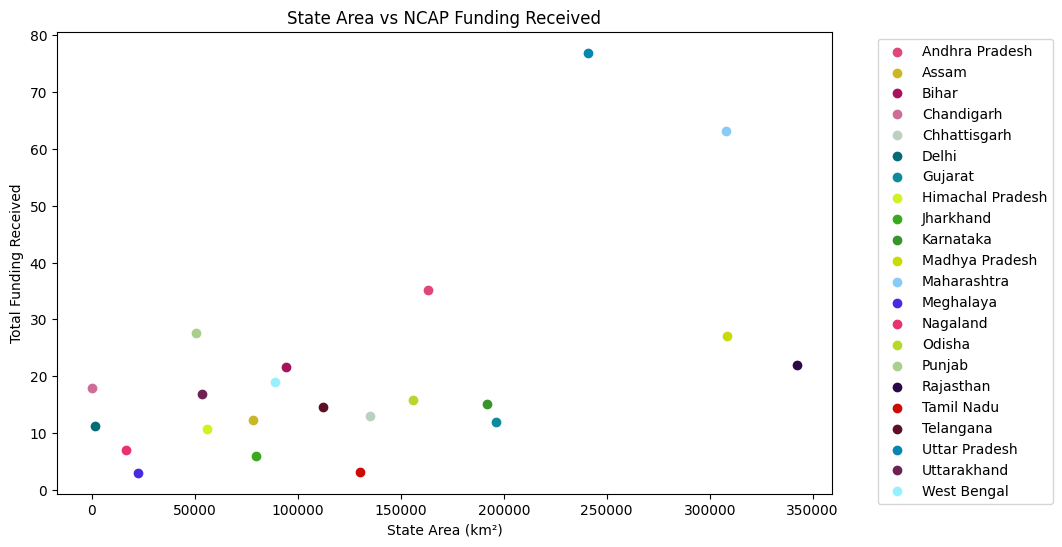

In [268]:
total_funds = fund_data.groupby("state")["total fund released"].sum()
merged_data = pd.merge(total_funds, state_data, on="state")
# display(merged_data)
plt.figure(figsize=(10, 6))
colors = np.random.rand(len(merged_data), 3) # Get a list of distinct colors

for i, state in enumerate(merged_data["state"].unique()):
    curr_state = merged_data[merged_data["state"] == state]
    plt.scatter(curr_state["area (km2)"], curr_state["total fund released"], color=colors[i], label=state)

plt.xlabel("State Area (km²)")
plt.ylabel("Total Funding Received")
plt.title("State Area vs NCAP Funding Received")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **7. Miscellaneous Questions**

##### 1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [269]:
data_2023 = data[data["timestamp"].str[0:4] == '2023']
most_polluted_city = data_2023.groupby("city")["pm2.5"].mean().idxmax()
print(f"Most polluted city in year 2023 = {most_polluted_city}")
city_data = data_2023[data_2023["city"] == most_polluted_city]
hazardous_days = city_data[city_data['pm2.5'] > 300]["timestamp"].nunique()
total_days = city_data["timestamp"].nunique()
print(f"Percentage = {hazardous_days/total_days*100:.2f}%")

Most polluted city in year 2023 = Darbhanga
Percentage = 0.82%


##### 2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

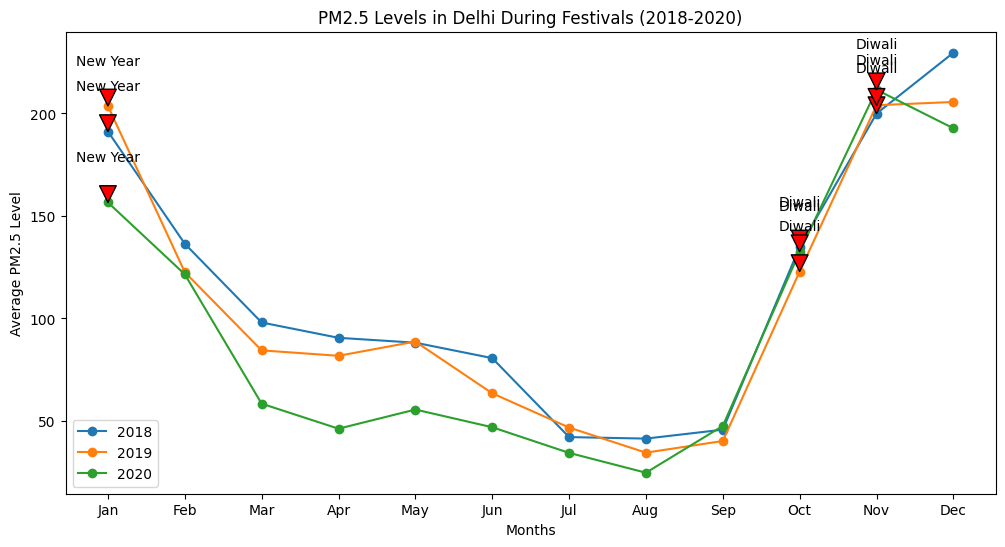

Yes, we observe significant pollution spikes during these festivals


In [270]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
delhi_data = data[data["state"] == "Delhi"]
delhi_data["year"] = delhi_data["timestamp"].str[0:4].astype(int)
delhi_data["month"] = delhi_data["timestamp"].str[5:7].astype(int)

delhi_monthly_avg = delhi_data.groupby(["year", "month"])["pm2.5"].mean()

years = [2018, 2019, 2020]
plt.figure(figsize=(12, 6))
for year in years:
    plt.plot(delhi_monthly_avg[year].index, delhi_monthly_avg[year], marker='o', label=f"{year}")

festival_months = {10: "Diwali", 11: "Diwali", 1: "New Year"}
for month, label in festival_months.items():
    for year in years:
        plt.annotate(label, 
                     xy=(month, delhi_monthly_avg[year][month]),
                     xytext=(month, delhi_monthly_avg[year][month] + 20),
                     arrowprops=dict(facecolor='red', shrink=0.5),
                     fontsize=10, ha='center')

plt.xlabel("Months")
plt.ylabel("Average PM2.5 Level")
plt.title("PM2.5 Levels in Delhi During Festivals (2018-2020)")
plt.legend()
plt.xticks(np.arange(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

print("Yes, we observe significant pollution spikes during these festivals")

##### 3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

Most funded state in year 2020 is Andhra Pradesh


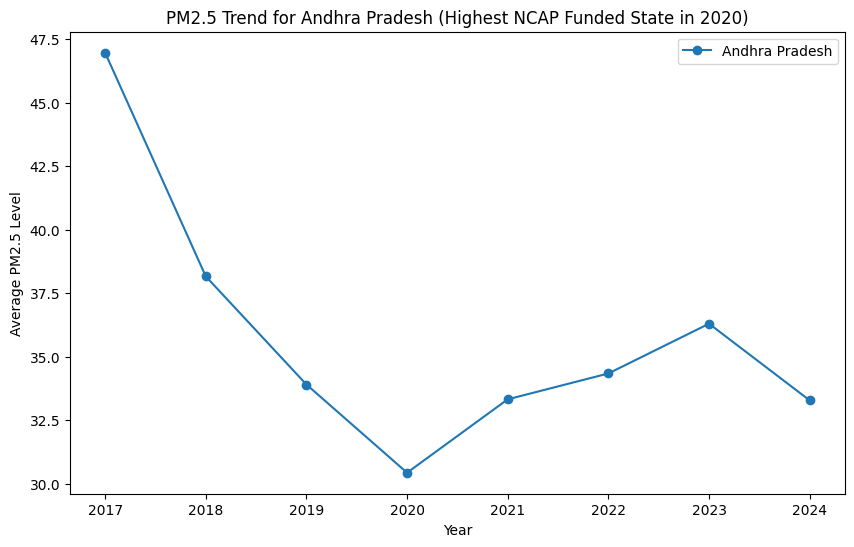

Seeing the graph we can say that the average PM2.5 was increasing from year 2020 uptill the year 2023


In [271]:
highest_funded_state = fund_data.groupby("state")["amount released during fy 2020-21"].sum().idxmax()
print(f"Most funded state in year 2020 is {highest_funded_state}")
highest_funded_state_data = data[data["state"] == highest_funded_state]
highest_funded_state_data["year"] = highest_funded_state_data["timestamp"].str[0:4].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(highest_funded_state_data["year"].unique(), highest_funded_state_data.groupby("year")["pm2.5"].mean(), marker='o', label=highest_funded_state)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title(f"PM2.5 Trend for {highest_funded_state} (Highest NCAP Funded State in 2020)")
plt.legend()
plt.show()

print("Seeing the graph we can say that the average PM2.5 was increasing from year 2020 uptill the year 2023")

##### 4. Draw the map of India and plot the sensor locations on the map.

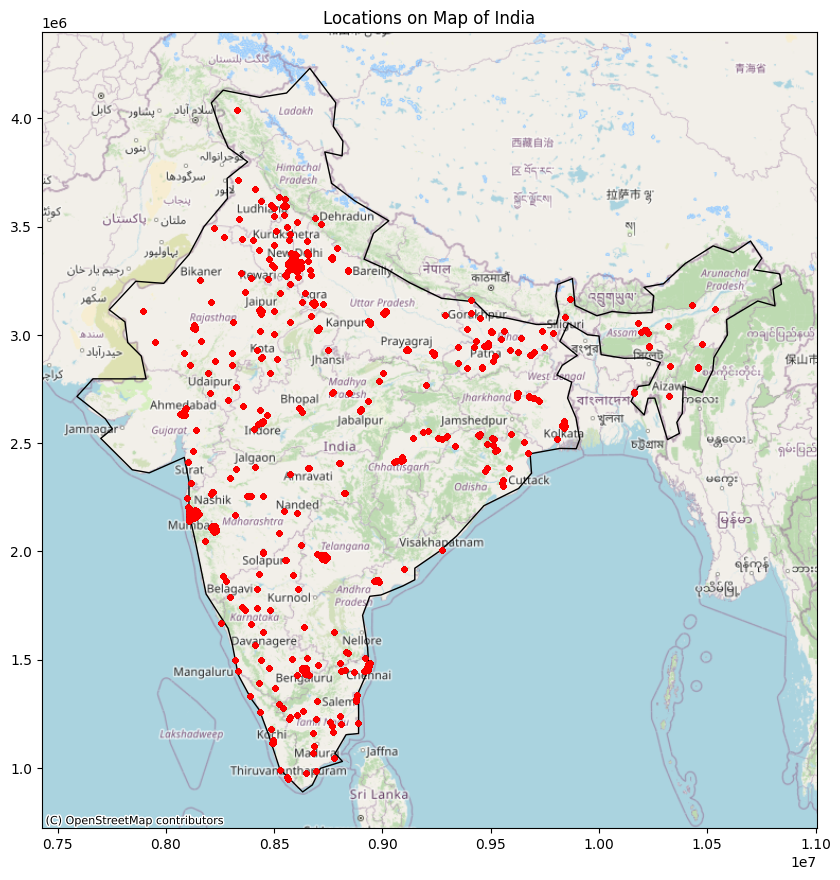

In [272]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load India boundary shapefile (Update path if needed)
shapefile_path = "INDIA MAP/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
india = world[world["ADMIN"] == "India"]

# Drop missing values
df = data.copy().dropna(subset=["latitude", "longitude"])

# Convert DataFrame to GeoDataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Convert to Web Mercator projection (needed for Contextily)
gdf_points = gdf_points.to_crs(epsg=3857)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 12))
india.to_crs(epsg=3857).plot(ax=ax, color="none", edgecolor="black", linewidth=1)  # India boundary
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add basemap
gdf_points.plot(ax=ax, color="red", markersize=8, alpha=0.7)  # Plot points

# Labels & Save
ax.set_title("Locations on Map of India")
plt.savefig("india_basemap.png", dpi=300, bbox_inches="tight")
plt.show()

# **8 Tell us something new** 

##### 1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 

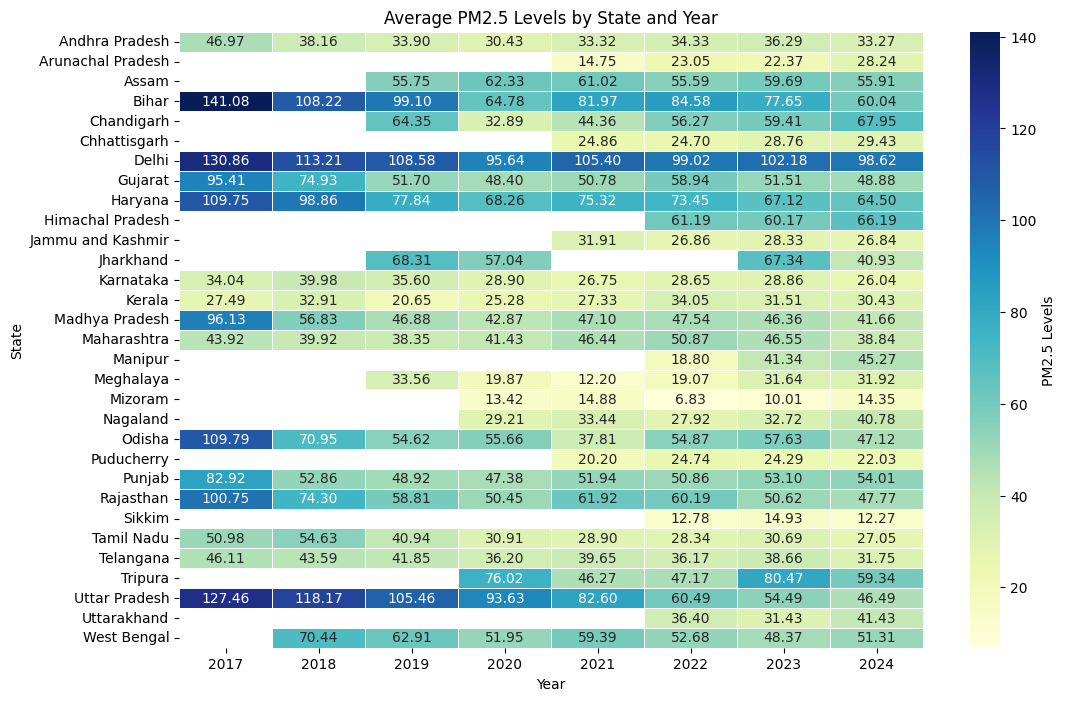

The white columns represent that data wasn't available for those years for those respective states


year,2017,2018,2019,2020,2021,2022,2023,2024
state,,,,,,,,
Andhra Pradesh,46.96687,38.158007,33.899712,30.42513,33.316491,34.334527,36.294259,33.274945
Arunachal Pradesh,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,14.751325,23.050072,22.368565,28.244467
Assam,Data Unavailable,Data Unavailable,55.752773,62.32941,61.01778,55.592354,59.685088,55.910395
Bihar,141.078562,108.22101,99.102163,64.782514,81.967836,84.582142,77.647134,60.041533
Chandigarh,Data Unavailable,Data Unavailable,64.345961,32.894744,44.360885,56.265032,59.414055,67.947498
Chhattisgarh,Data Unavailable,Data Unavailable,Data Unavailable,Data Unavailable,24.863968,24.699754,28.760103,29.431787
Delhi,130.85772,113.206232,108.578564,95.639458,105.401629,99.017342,102.183923,98.619420
Gujarat,95.407411,74.928081,51.704527,48.396896,50.780194,58.938841,51.507093,48.875342
Haryana,109.748065,98.859724,77.840177,68.26008,75.320179,73.45313,67.117568,64.503054


In [273]:
# Average PM2.5 level in each state for each year (to know if average pollution is getting better at different states with time or not)

import seaborn as sns

data_copy = data.copy()
data_copy["year"] = data["timestamp"].str[0:4]
avg_data = data_copy.groupby(["state", "year"])["pm2.5"].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(avg_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'PM2.5 Levels'}, linewidths=0.5)
plt.title("Average PM2.5 Levels by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

print("The white columns represent that data wasn't available for those years for those respective states")

avg_data.fillna("Data Unavailable", inplace=True)
display(avg_data)